# **Demonstration: Running a pre-trained neural network linear regression model on a dataset**
# Import libraries

In [1]:
from pathlib import Path
from json import load
from PhotZ_LR import PhotZ_LR

# Import default configurations

model_config.json has default hyperparameters for the PhotZ_LR model: 
* number of input features
* nubmer of hidden neurons for each layer
* nubmer of hidden layers
* nubmer of training epochs
* learning rate
* batch size
* momentum

In [2]:
PACKAGE_PATH = Path.cwd()
with open("./model_config.json", "r") as f:
    json_dict = load(f)
    PhotZ_LR_config = json_dict["model"]["PhotZ_LR"]
PhotZ_LR_config

{'num_input_features': 5,
 'num_hidden_neurons': 128,
 'num_hidden_layers': 5,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32,
 'momentum': 0.9}

# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input/output paths
    * `input_csv_path`: the path of the input csv file of photometric redshift
    * `output_csv_path`
    * `output_pdf_path`
    * `model_path`: the path of the bese model to be saved

* Training-specific hyperparameters (**can be set to arbitrary values for only running**)
    * `evaluation`: perform base-evaluation if set to True
    * `evaluation_ratio`: the ratio of a base evaluation set -- a value in between 0 and 1
    * `train_ratio`: the ratio of a training set -- a value in between 0 and 1

* Others
    * `model_no`: model number (not a hyperparameter) 

In [3]:
PACKAGE_PATH = Path.cwd()
model_name = "PhotZ_LR_model_relz"
PhotZ_LR_config.update({
    "input_csv_path": PACKAGE_PATH / 'data/relz.csv',
    "model_path": PACKAGE_PATH / f'data/{model_name}.pth',
    "output_csv_path": PACKAGE_PATH / f'data/results_{model_name}.csv',
    "output_pdf_path": PACKAGE_PATH / f'data/results_{model_name}.pdf',

    # hyperparameters
    "evaluation": True,
    "evaluation_ratio": 0.3,
    "train_ratio": 0.999,
    
    "model_no": 0
})

# Create a model instance

The constructor takes all the parameters specified in the previous cell. If any of them is missing, it will raise an error.

In [4]:
PhotZ_LR_model = PhotZ_LR(**PhotZ_LR_config)

# Run the model on a dataset

`PhotZ_LR.preprocess_data()` loads the input CSV files from the specified paths and preprocess the data in an appropriate format to be evaluated.

`PhotZ_LR.build_dl()`
* takes the formatted data, returned by `PhotZ_LR.preprocess_data()`
* returns a dictionary of `DataLoader` objects to be evaluated

`PhotZ_LR.evaluate_model`
* takes the original data and the `Dataloader` dictionary
* returns photometric redshift estimates through the neural network linear regression

`PhotZ_LR.save_results`
* takes the results returned by `PhotZ_LR.evaluate_model()`
* generates a scatter plot: spectroscopic redshift vs. photometric redshift
* saves the photometric redshift estimates

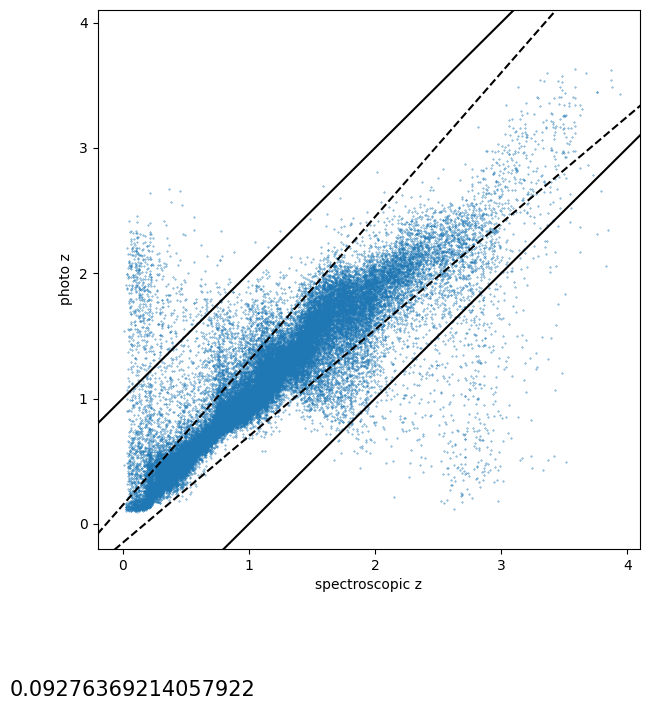

In [5]:
data = PhotZ_LR_model.preprocess_data()
dl = PhotZ_LR_model.build_dl(data)
results = PhotZ_LR_model.evaluate_model(data, dl)
PhotZ_LR_model.save_results(results)